In [33]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline
import os, sys
sys.path.append("/home/naomi/mymodules")
from ingrid.smooth121 import Smooth121

nx=10;ny=8
da_random2d = xr.DataArray(np.random.randn(ny, nx), dims=('y', 'x'))
x = np.linspace(0,9,nx); y = np.linspace(0,7,ny); y2 = np.linspace(0,7,ny-1)
ds = xr.Dataset({'x': ('x', x), 'y': ('y', y), 'y2': ('y2', y2)})
ds['rand'] = da_random2d
drand = ds.rand.diff(dim='y')
rand = 0*ds.rand
rand[3,4]=1

In [36]:
srand = Smooth121(rand, ['y', 'x'], perdims = ['x'])
ds['srand'] = (['y','x'],srand)
ds.srand.sum()

<xarray.DataArray 'srand' ()>
array(1.0)

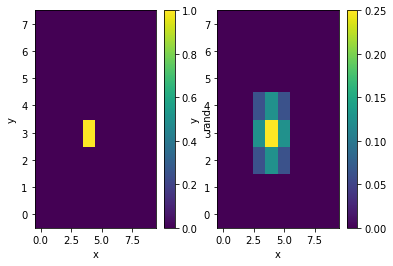

In [37]:
plt.subplot(1,2,1)
rand.plot()
plt.subplot(1,2,2)
srand.plot()

b'' None
b'' None
('Y',)
('Y',)
('Y',) ('Y',)


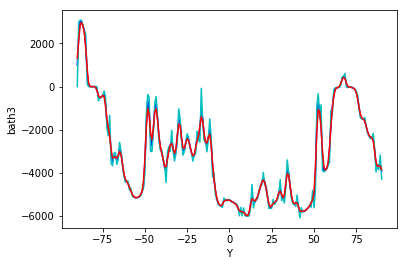

In [4]:
from subprocess import Popen, PIPE

p = Popen(['/usr/local/bin/ingrid'], stdin=PIPE, stdout=PIPE) 
ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH432 .bath X 180 VALUE X removeGRID
[Y] 1 SM121
(bath-SM121.nc)writeCDF 
\\end{ingrid}
"""
ingridout, ingriderr = p.communicate(input=bytes(ingridcode, 'utf-8'))
print(ingridout,ingriderr)

p = Popen(['/usr/local/bin/ingrid'], stdin=PIPE, stdout=PIPE) 
ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH432 .bath X 180 VALUE X removeGRID
(bath.nc)writeCDF 
\\end{ingrid}
"""
ingridout, ingriderr = p.communicate(input=bytes(ingridcode, 'utf-8'))
print(ingridout,ingriderr)

ds1 = xr.open_dataset('bath.nc')
print(ds1.bath.dims)
ds2 = xr.open_dataset('bath-SM121.nc')
print(ds2.bath.dims)
bath3 = Smooth121(ds2.bath, ['Y'], NSmooths=1)
print(ds2.bath.dims,bath3.dims)
ds1['bath3'] = (['Y'], bath3)
ds2.bath.plot(color='b')
ds1.bath.plot(color='c')
ds1.bath3.plot(color='r')


([<matplotlib.lines.Line2D at 0x7f9d1212aa90>],
 [<matplotlib.lines.Line2D at 0x7f9d12132470>])

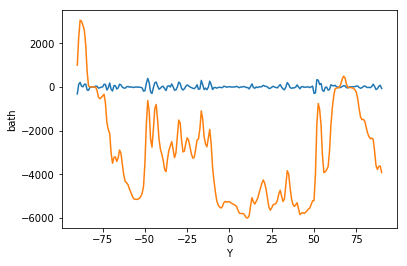

In [5]:
diff = ds2.bath - ds1.bath3
diff.plot(),ds2.bath.plot()